# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

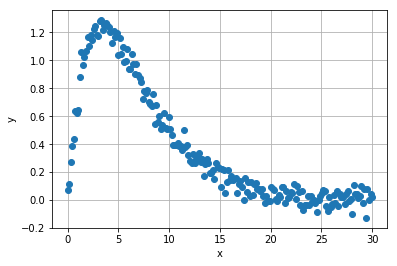

In [3]:
# TODO
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [4]:
# TODO
xtr, xts, ytr, yts = train_test_split(x,y,test_size=0.5)
print(xtr.shape, ytr.shape)
print(xts.shape, yts.shape)


(100,) (100,)
(100,) (100,)


Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

0.002283168890898791
0.0030486845510047213


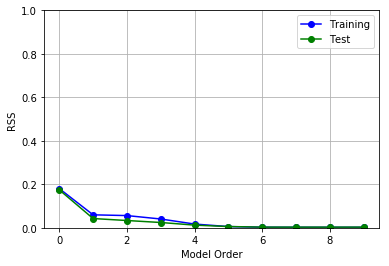

In [5]:
# TODO
import numpy.polynomial.polynomial as poly
dtest = np.array(range(0,10))
RSStest = []
RSStr = []
for d in dtest:
    
    # Fit data
    beta_hat = poly.polyfit(xtr,ytr,d)
    # Measure RSS on training data
    # This is not necessary, but we do it just to show the training
    yhat = poly.polyval(xtr,beta_hat)
    RSSd = np.mean((yhat-ytr)**2)
    RSStr.append(RSSd)
    
    # Measure RSS on test data
    yhat = poly.polyval(xts,beta_hat)
    RSSd = np.mean((yhat-yts)**2)
    RSStest.append(RSSd)
    
plt.plot(dtest,RSStr,'bo-')
plt.plot(dtest,RSStest,'go-')
plt.xlabel("Model Order")
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,1)
plt.legend(['Training', 'Test'],loc='upper right')

print(np.min(RSStr))
print(np.min(RSStest))

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

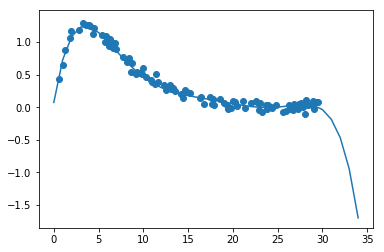

In [6]:
# TODO
x = np.array(range(0,35))
d = 6
beta_hat = poly.polyfit(xtr,ytr,d)
# Measure RSS on test data
yhat = poly.polyval(x,beta_hat)
plt.plot(x,yhat)
plt.scatter(xts,yts)